Use ResNet18 pre-trained on ImageNet (Pre-trained models can be found online). Finetune the
model on X dataset for classification task and plot curves for training loss and training accuracy.
Report the final top-5 test accuracy. Perform the above task with any 3 optimizers from the
following list.
1. Adam
2. Adagrad
3. Adadelta
4. RMSprop

X = STL 10, if last digit of your roll no. is odd

In [ ]:
import torch
import torchvision.models as models

num_classes = 100  
resnet = models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = torch.nn.Linear(num_ftrs, num_classes)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


In [ ]:
resnet.fc.in_features

512

In [ ]:
from torchvision import transforms
from torchvision import datasets
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_data = datasets.STL10(root='./data', split='train', download=True, transform=train_transforms)
test_data = datasets.STL10(root='./data', split='test', download=True, transform=test_transforms)


train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)


100%|██████████| 2640397119/2640397119 [02:27<00:00, 17911710.08it/s]


Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


ADAM Optimizer

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)
for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        break
print(inputs.shape)

torch.Size([128, 3, 32, 32])


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.0)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

num_epochs = 100
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_total = 0
    val_total = 0
    train_correct = 0
    val_correct = 0
    
    resnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_losses.append(train_loss/len(train_loader))




In [ ]:
resnet.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_acc = 100 * val_correct / val_total
       
        val_losses.append(epoch_val_loss)
        train_accs.append(epoch_train_acc)
        val_accs.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_train_loss:.4f}, '
              f'Validation Loss: {epoch_val_loss:.4f}, '
              f'Training Accuracy: {epoch_train_acc:.2f}%, '
              f'Validation Accuracy: {epoch_val_acc:.2f}%')


Epoch 100/100, Training Loss: 5.2474, Validation Loss: 0.6541, Training Accuracy: 0.88%, Validation Accuracy: 0.78%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 1.3178, Training Accuracy: 0.88%, Validation Accuracy: 1.56%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 1.9773, Training Accuracy: 0.88%, Validation Accuracy: 1.30%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 2.6307, Training Accuracy: 0.88%, Validation Accuracy: 1.17%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 3.2915, Training Accuracy: 0.88%, Validation Accuracy: 0.94%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 3.9635, Training Accuracy: 0.88%, Validation Accuracy: 0.78%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 4.6163, Training Accuracy: 0.88%, Validation Accuracy: 0.89%
Epoch 100/100, Training Loss: 5.2474, Validation Loss: 5.2844, Training Accuracy: 0.88%, Validation Accuracy: 0.80%


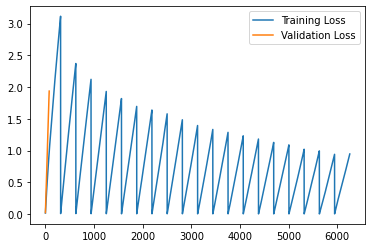

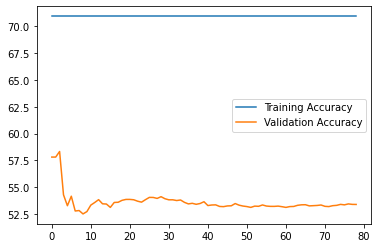

In [ ]:

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.003, betas=(0.8, 0.987), eps=1e-08, weight_decay=0.0)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_total = 0
    val_total = 0
    train_correct = 0
    val_correct = 0
    
    resnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_losses.append(train_loss/len(train_loader))
        train_accs.append(train_correct/train_total)

In [ ]:
resnet.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_acc = 100 * val_correct / val_total
       
        val_losses.append(epoch_val_loss)
        
        val_accs.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_train_loss:.4f}, '
              f'Validation Loss: {epoch_val_loss:.4f}, '
              f'Training Accuracy: {epoch_train_acc:.2f}%, '
              f'Validation Accuracy: {epoch_val_acc:.2f}%')


Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.0262, Training Accuracy: 73.19%, Validation Accuracy: 50.78%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.0535, Training Accuracy: 73.19%, Validation Accuracy: 52.34%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.0792, Training Accuracy: 73.19%, Validation Accuracy: 52.60%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.1131, Training Accuracy: 73.19%, Validation Accuracy: 51.17%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.1415, Training Accuracy: 73.19%, Validation Accuracy: 50.62%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.1662, Training Accuracy: 73.19%, Validation Accuracy: 51.56%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.1940, Training Accuracy: 73.19%, Validation Accuracy: 52.01%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.2219, Training Accuracy: 73.19%, Validation Accuracy: 52.44%
Epoch 20/20, Training Loss: 0.8792, Validation Loss: 0.2505, Training Ac

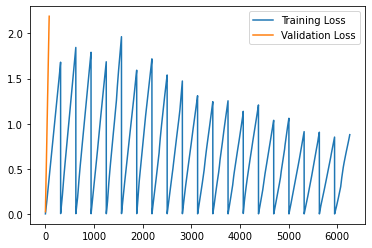

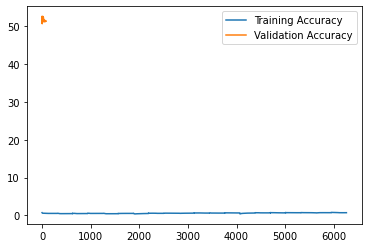

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
optimizer = torch.optim.Adagrad(resnet.parameters(), lr=0.01, lr_decay=0.0, weight_decay=0.0, initial_accumulator_value=0, eps=1e-10)


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_total = 0
    val_total = 0
    train_correct = 0
    val_correct = 0
    
    resnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_losses.append(train_loss/len(train_loader))
        train_accs.append(train_correct/train_total)

In [ ]:
resnet.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_acc = 100 * val_correct / val_total
       
        val_losses.append(epoch_val_loss)
        
        val_accs.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_train_loss:.4f}, '
              f'Validation Loss: {epoch_val_loss:.4f}, '
              f'Training Accuracy: {epoch_train_acc:.2f}%, '
              f'Validation Accuracy: {epoch_val_acc:.2f}%')


Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.0302, Training Accuracy: 94.55%, Validation Accuracy: 59.38%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.0582, Training Accuracy: 94.55%, Validation Accuracy: 58.98%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.0935, Training Accuracy: 94.55%, Validation Accuracy: 58.07%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.1338, Training Accuracy: 94.55%, Validation Accuracy: 55.27%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.1754, Training Accuracy: 94.55%, Validation Accuracy: 53.75%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.2064, Training Accuracy: 94.55%, Validation Accuracy: 54.43%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.2455, Training Accuracy: 94.55%, Validation Accuracy: 53.79%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.2778, Training Accuracy: 94.55%, Validation Accuracy: 54.30%
Epoch 20/20, Training Loss: 0.1726, Validation Loss: 0.3141, Training Ac

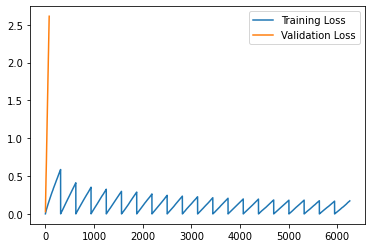

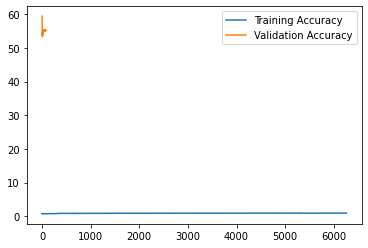

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
optimizer = torch.optim.Adagrad(resnet.parameters(), lr=0.0001, lr_decay=0.0, weight_decay=0.1, initial_accumulator_value=0, eps=1e-10)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_total = 0
    val_total = 0
    train_correct = 0
    val_correct = 0
    
    resnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_losses.append(train_loss/len(train_loader))
        train_accs.append(train_correct/train_total)

In [ ]:
resnet.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_acc = 100 * val_correct / val_total
       
        val_losses.append(epoch_val_loss)
        
        val_accs.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_train_loss:.4f}, '
              f'Validation Loss: {epoch_val_loss:.4f}, '
              f'Training Accuracy: {epoch_train_acc:.2f}%, '
              f'Validation Accuracy: {epoch_val_acc:.2f}%')


Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.0274, Training Accuracy: 94.72%, Validation Accuracy: 63.28%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.0586, Training Accuracy: 94.72%, Validation Accuracy: 60.55%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.0912, Training Accuracy: 94.72%, Validation Accuracy: 58.33%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.1296, Training Accuracy: 94.72%, Validation Accuracy: 56.45%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.1687, Training Accuracy: 94.72%, Validation Accuracy: 55.78%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.1982, Training Accuracy: 94.72%, Validation Accuracy: 55.99%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.2318, Training Accuracy: 94.72%, Validation Accuracy: 56.14%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.2664, Training Accuracy: 94.72%, Validation Accuracy: 56.05%
Epoch 20/20, Training Loss: 0.1678, Validation Loss: 0.3008, Training Ac

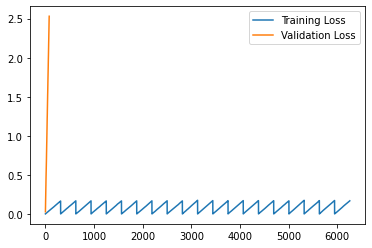

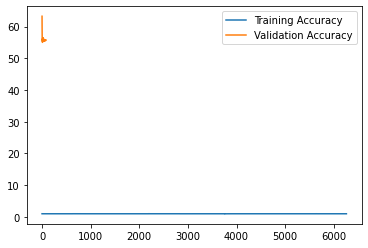

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
optimizer = torch.optim.RMSprop(resnet.parameters(), lr=0.001, alpha=0.99, eps=1e-08, weight_decay=0.0, momentum=0.0, centered=False)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_total = 0
    val_total = 0
    train_correct = 0
    val_correct = 0
    
    resnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_losses.append(train_loss/len(train_loader))
        train_accs.append(train_correct/train_total)

In [ ]:
resnet.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_acc = 100 * val_correct / val_total
       
        val_losses.append(epoch_val_loss)
        
        val_accs.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_train_loss:.4f}, '
              f'Validation Loss: {epoch_val_loss:.4f}, '
              f'Training Accuracy: {epoch_train_acc:.2f}%, '
              f'Validation Accuracy: {epoch_val_acc:.2f}%')


Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.0615, Training Accuracy: 94.14%, Validation Accuracy: 41.41%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.1190, Training Accuracy: 94.14%, Validation Accuracy: 41.80%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.1822, Training Accuracy: 94.14%, Validation Accuracy: 38.80%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.2541, Training Accuracy: 94.14%, Validation Accuracy: 38.48%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.3136, Training Accuracy: 94.14%, Validation Accuracy: 39.06%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.3631, Training Accuracy: 94.14%, Validation Accuracy: 39.71%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.4247, Training Accuracy: 94.14%, Validation Accuracy: 39.40%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.4818, Training Accuracy: 94.14%, Validation Accuracy: 39.06%
Epoch 20/20, Training Loss: 0.1834, Validation Loss: 0.5495, Training Ac

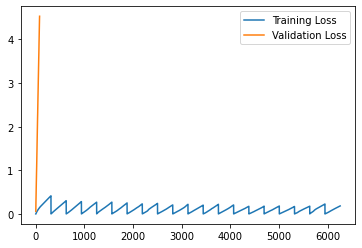

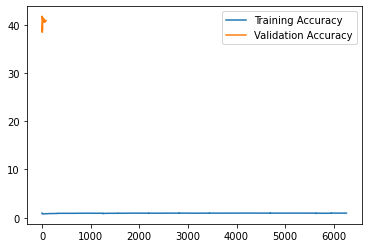

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
optimizer = torch.optim.RMSprop(resnet.parameters(), lr=0.002, alpha=0.96, eps=1e-08, weight_decay=0.0, momentum=0.0, centered=False)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_total = 0
    val_total = 0
    train_correct = 0
    val_correct = 0
    
    resnet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_losses.append(train_loss/len(train_loader))
        train_accs.append(train_correct/train_total)

In [ ]:
resnet.eval()
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_acc = 100 * val_correct / val_total
       
        val_losses.append(epoch_val_loss)
        
        val_accs.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Training Loss: {epoch_train_loss:.4f}, '
              f'Validation Loss: {epoch_val_loss:.4f}, '
              f'Training Accuracy: {epoch_train_acc:.2f}%, '
              f'Validation Accuracy: {epoch_val_acc:.2f}%')


Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.0371, Training Accuracy: 91.92%, Validation Accuracy: 53.91%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.0722, Training Accuracy: 91.92%, Validation Accuracy: 56.25%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.1163, Training Accuracy: 91.92%, Validation Accuracy: 53.91%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.1594, Training Accuracy: 91.92%, Validation Accuracy: 51.37%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.1971, Training Accuracy: 91.92%, Validation Accuracy: 51.72%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.2327, Training Accuracy: 91.92%, Validation Accuracy: 52.47%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.2823, Training Accuracy: 91.92%, Validation Accuracy: 52.01%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.3235, Training Accuracy: 91.92%, Validation Accuracy: 51.76%
Epoch 20/20, Training Loss: 0.2512, Validation Loss: 0.3623, Training Ac

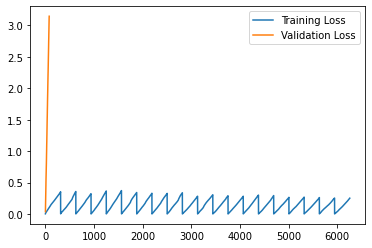

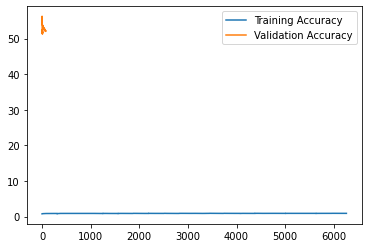

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.show()